# Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Setting Path.

In [2]:
path = r'C:\Users\Chaot\02-2024 Instacart Basket Analysis'
path

'C:\\Users\\Chaot\\02-2024 Instacart Basket Analysis'

# Importing Dataframe.

In [3]:
cop_merged = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '4.9_cop_merged.pkl'))

In [42]:
pd.set_option("display.max_columns", None)
cop_merged.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spender_flag,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Medium Range Product,Regularly busy days,Average Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Medium Range Product,Least busiest days,Average Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Medium Range Product,Least busiest days,Most Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Medium Range Product,Least busiest days,Average Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Medium Range Product,Least busiest days,Most Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Medium Range Product,Regularly busy days,Average Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Medium Range Product,Busiest days,Most Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Medium Range Product,Busiest days,Most Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Medium Range Product,Busiest days,Most Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Medium Range Product,Least busiest days,Average Orders,10,New Customer,6.367797,Low,20.5,Non-Frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
cop_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_days            object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  mean_product_price      float64
 19  spender_flag            object 
 20  customer_frequency      float64
 21  frequency_flag          objec

# 4.9.3 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

In [79]:
# Creating a dataframe with no dupelicate order IDs per hour of day.
ohod = cop_merged[['order_hour_of_day','order_id']].drop_duplicates()

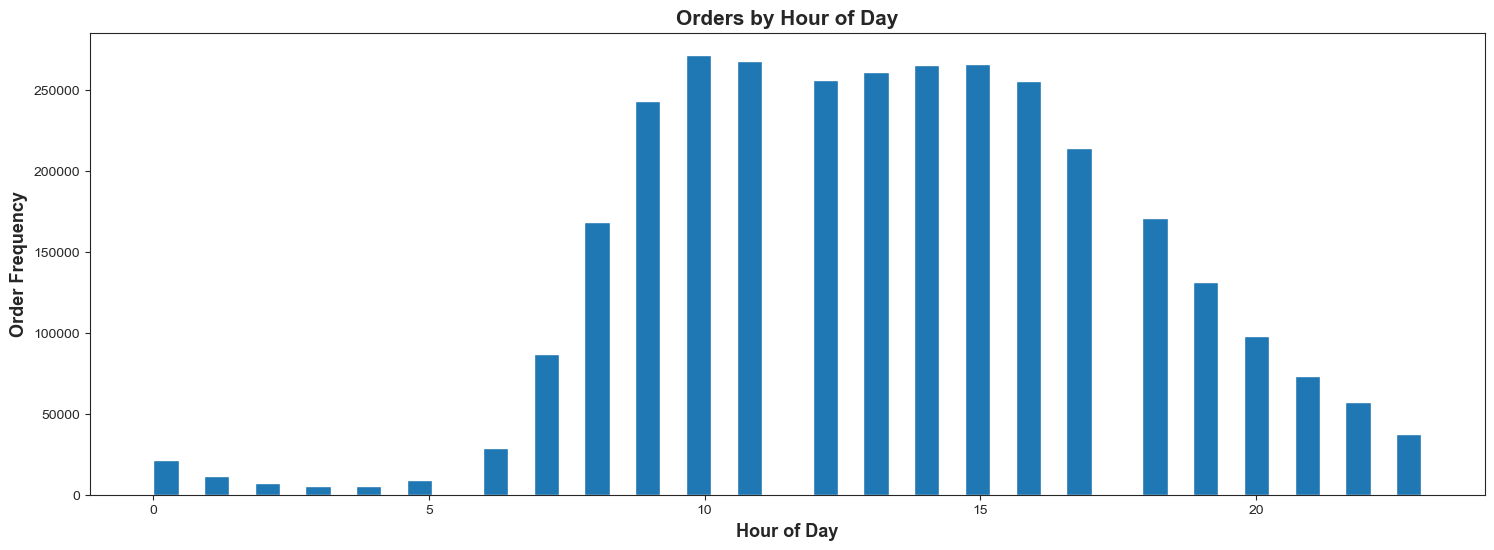

In [91]:
ohod_hist = ohod['order_hour_of_day'].plot.hist(bins = 50, figsize = (18,6))
sns.set_style('ticks')
plt.xlabel('Hour of Day', fontsize = 13, fontweight = 'bold')
plt.ylabel('Order Frequency', fontsize = 13, fontweight = 'bold')
plt.title('Orders by Hour of Day', fontsize = 15, fontweight = 'bold')
plt.show()

From the above histogram, we see that the highest frequency of orders exist between the the 9th and 16th hour, which in our data frame is flagged as the busiest order time. Below we have the descriptive stats of the the order hour of day. Below that is a view of the order hour of day along with its classified flag for busiest period.

In [81]:
#Descriptive stats of column.

ohod['order_hour_of_day'].describe()

count    3.214668e+06
mean     1.344352e+01
std      4.226249e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [33]:
# Creating a dataframe with just the order hour of day and busiest period of day columns with no duplicates.
# Displaying the hour of day with busiest period flag while sorted on hour of day.

ohod_bpod = cop_merged[['order_hour_of_day','busiest_period_of_day']].drop_duplicates()
ohod_bpod.sort_values('order_hour_of_day')

,order_hour_of_day,busiest_period_of_day
5484,0,Fewest Orders
8445,1,Fewest Orders
6112,2,Fewest Orders
6123,3,Fewest Orders
140,4,Fewest Orders
1448,5,Fewest Orders
419,6,Fewest Orders
1,7,Average Orders
0,8,Average Orders
6,9,Most Orders


# 4.9.4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.


In [58]:
# Pulling unique order ID for loyalty flag into new dataframe.
# Examining the new data frame.
order_dis_loyal = cop_merged[['order_id','loyalty_flag']].drop_duplicates()
order_dis_loyal.describe()

,order_id
count,3.214685e+06
mean,1.710828e+06
std,9.875193e+05
min,2.000000e+00
25%,8.556880e+05
50%,1.711120e+06
75%,2.566033e+06
max,3.421083e+06


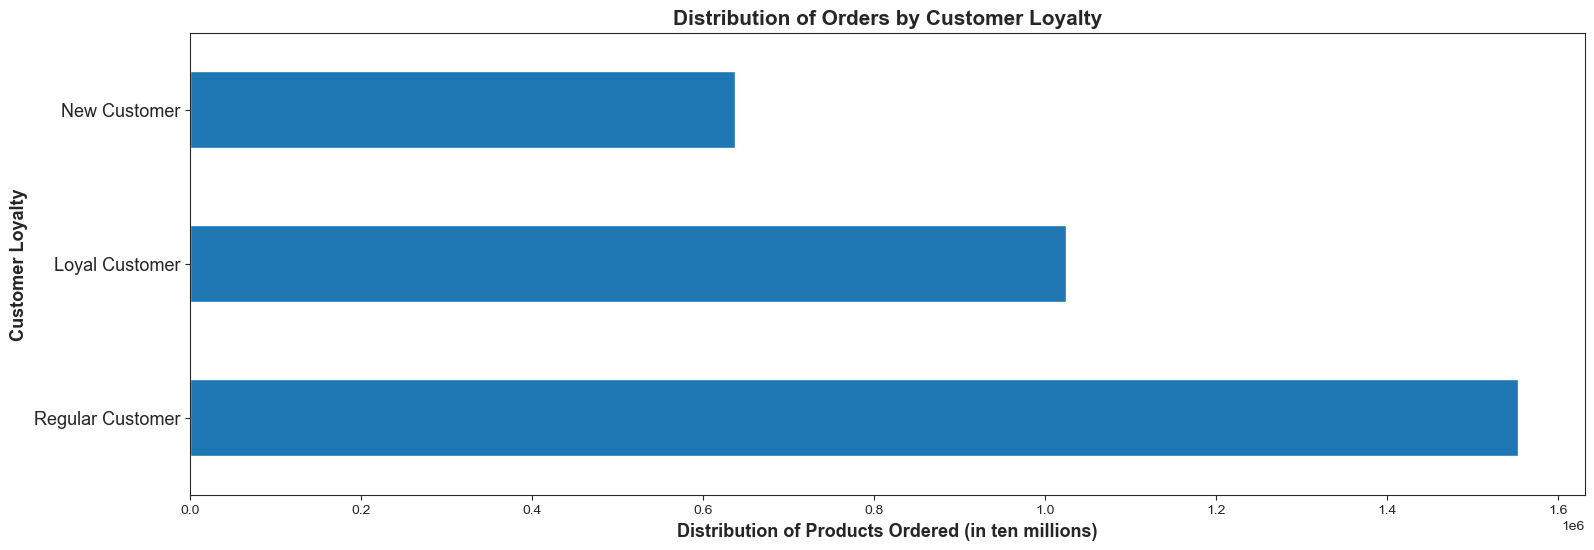

In [56]:
loyalty_bar = order_dis_loyal['loyalty_flag'].value_counts().plot.barh(figsize= (18,6))
sns.set_style('ticks')
plt.xlabel('Distribution of Products Ordered (in ten millions)',fontsize=13, fontweight = 'bold')
plt.ylabel('Customer Loyalty',fontsize=13, fontweight = 'bold')
plt.title('Distribution of Orders by Customer Loyalty',fontsize=15, fontweight = 'bold')
plt.yticks(fontsize = 13)
plt.show()

# 4.9.5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [69]:
# Setting prices that are greater than 100 to not available/null.
cop_merged.loc[cop_merged['prices'] > 100] = np.nan

In [71]:
np.random.seed(4)
dev = np.random.rand(len(cop_merged)) <= 0.7

big = cop_merged[dev]
small = cop_merged[~dev]

In [72]:
len(cop_merged)

32404859

In [77]:
len(big) + len(small)

9721098

In [74]:
price_ohod = small[['order_hour_of_day','prices']]

G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


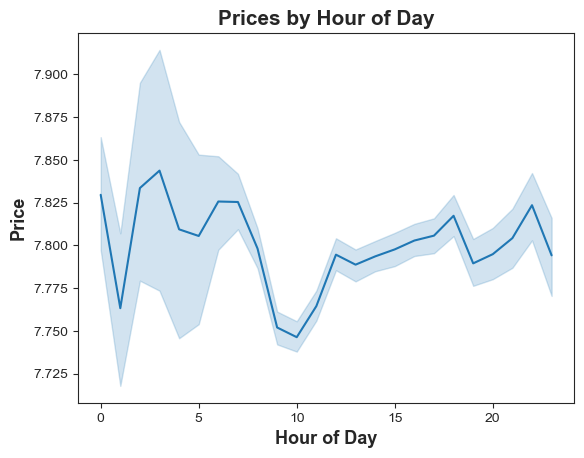

In [107]:
line_price_ohod = sns.lineplot(data = price_ohod, x = 'order_hour_of_day', y = 'prices')
sns.set_style('ticks')
plt.xlabel('Hour of Day', fontsize = 13, fontweight = 'bold')
plt.ylabel('Price', fontsize = 13, fontweight = 'bold')
plt.title('Prices by Hour of Day', fontsize = 15, fontweight = 'bold')
plt.show()

# 4.9.6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [109]:
# Age(age) and number of dependents (n_dependants) and income (income)
adi = cop_merged[['age','n_dependants','income']].drop_duplicates()
adi

,age,n_dependants,income
0,31.0,3.0,40423.0
59,69.0,0.0,54313.0
131,62.0,1.0,151988.0
335,71.0,0.0,124643.0
540,38.0,1.0,52311.0
...,...,...,...
32404816,57.0,1.0,135623.0
32404819,19.0,0.0,76190.0
32404826,38.0,1.0,41766.0
32404829,25.0,0.0,53755.0


G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


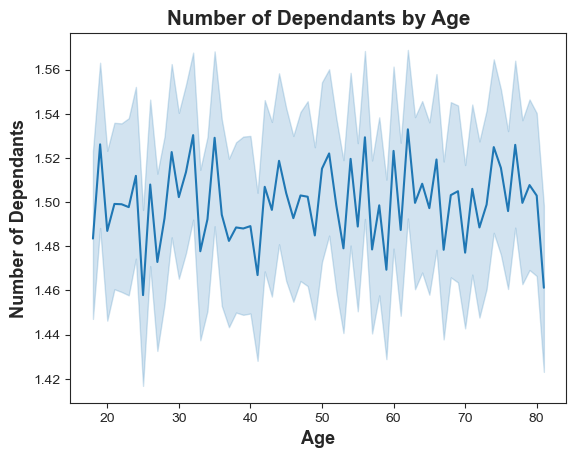

In [114]:
line_dependants_age = sns.lineplot(data = adi, x = 'age', y = 'n_dependants')
sns.set_style('ticks')
plt.xlabel('Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of Dependants', fontsize = 13, fontweight = 'bold')
plt.title('Number of Dependants by Age', fontsize = 15, fontweight = 'bold')
plt.show()

# 4.9.7 - You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


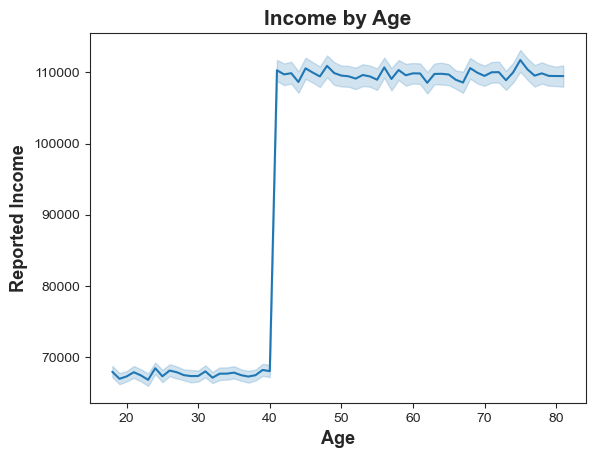

In [110]:
line_income_age = sns.lineplot(data = adi, x = 'age', y = 'income')
sns.set_style('ticks')
plt.xlabel('Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('Reported Income', fontsize = 13, fontweight = 'bold')
plt.title('Income by Age', fontsize = 15, fontweight = 'bold')
plt.show()

# 4.9.8 - Export your visualizations as “.png” files in your relevant project folder.

In [115]:
ohod_hist.figure.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', '4.9.orderHoD_histogram.png'))
loyalty_bar.figure.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', '4.9.order_loyalty_bar.png'))
line_price_ohod.figure.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', '4.9.price_orderHoD_line.png'))
line_dependants_age.figure.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', '4.9.dependant_age_line.png'))
line_income_age.figure.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', '4.9.income_age_line.png'))